## Completion of SEIR Project

At this point, you should have a working method of bringing your observations of deaths into agreement with your model. Broadly speaking, this software will:

* Import data on the deaths per week and the populations of each state in the US.
* Run an SEIRD model and provide comparisons between model output and data at the appropriate dates. This comparison results in sum square error or SSE for the run.
* Use Powell's method followed by the simplex method in order to minimize the SSE for some set of parameters that consists of the 7 coefficients describing a sixth order polynomial approximation of $\beta(t)$ and a scalar valued death rate. 
* This should be done for each state and the optimal set of coefficients saved to a file.

Going forward, it may be helpful to acquire additional data, or compute additional information. So ideas are:

* The $R_o$ is generally easier to think about than the $\beta(t)$. It is just the product $\beta(t) \gamma$ and tells you the number of cases resulting from a case. If it is less than 1 the number of cases is decreasing.
* The initial weeks of the infection probably reveal an $R_o$ that reflects what happens when people are taking no precautions to reduce the spread. Capture this data.
* $1 - \frac{1}{R_o}$ is the herd immunity threshold. Beyond this point of infection or vaccination or infection in the population, we expect the number of new cases to decline to zero. Find this using the $R_o$ that you think corresponds to pre-pandemic levels of interaction between people.
* It might be interesting to collect the so-called 'excess deaths' and compare them to the observed deaths as a basic check on under/over reporting.
* It's fairly easy to get data on vaccinations too.

To complete the analysis, the following additional need to be completed and questions answered:

1. Write code to create a `pandas` data frame containing relevant information from your simulations. This is going to be simulation output, as well as some of the processed data that is cited above.
2. Plot several fields from your simulation results using `geopandas`. This will require you to merge your data frame with one containing the geometric information of each state. Example code appears below.
3. Identify three states that you believe are outliers in terms of the dynamics.
4. Speculate on the reasons some states are outliers. Provide support in terms of data.
5. Based on your speculations in the previous problem, provide a numerical estimate of the uncertainty in key parameters using MCMC.
6. State 3 conclusions you can reach from completing this exercise. Base at least one on the idea that:
$$f_v = \frac{f_h-f_i}{1-f_i}$$
where $f_v$ is the fraction requiring vaccination, $f_i$ is the fraction that has been infected, and $f_h$ is the fraction required to reach heard immunity.


### Data Visualization
For the purpose of comparing states, it is convenient to create a map of some sort. The code below does that with a simple function I have written.

In [1]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# State boundary geometries
states = geopandas.read_file("gz_2010_us_040_00_500k.json")



data = pd.read_pickle("data_file.pkl")

# Move AK and HI to better places for plotting
m = states.NAME == "Alaska"
states[m] = states[m].set_geometry(states[m].scale(.3,.3,0))
states[m] = states[m].set_geometry(states[m].translate(-70,-35))

m = states.NAME == "Hawaii"
states[m] = states[m].set_geometry(states[m].translate(54,5))

# Get my COVID results
# cd = pandas.read_pickle("COVID_Results_frame.bz2")
# If the index is the name of the place we can join tables on that
# cd.index.rename("NAME",inplace=True)

# Join geometry frame with my frame into combined data frame 
cdf = states.merge(data,on="NAME")


In [2]:
cdf.set_index('Death_rate')

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,Ro_max,POPULATION,C,Eo,DEATHS,solutions
Death_rate,,,,,,,,,,,,
0.000557,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",0.269075,1344212.0,"[0.0670742137836364, 0.09562641394603402, 0.05...",2.103758e-05,725.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.001855,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",0.642995,6892503.0,"[0.09742421130239938, 0.44540488713610205, 0.6...",1.427319e-10,12860.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.001496,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...",0.523697,9986857.0,"[0.10108600383615066, 0.299024128054761, 0.128...",1.397662e-07,14948.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.001555,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9...",0.299767,1068778.0,"[0.09631326610591794, 0.06436115753338362, -0....",1.063369e-06,1509.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.001762,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9...",0.389501,3080156.0,"[0.0676773791163266, 0.030292905417251798, 0.1...",1.897640e-07,5356.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.002520,0400000US34,34,New Jersey,,7354.220,"POLYGON ((-75.52684 39.65571, -75.52634 39.656...",0.649526,8882190.0,"[0.12392466007769487, 0.47504010057248436, 0.3...",1.553505e-09,22620.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.001387,0400000US36,36,New York,,47126.399,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...",0.528766,19453561.0,"[0.09561860218454596, 0.1629729253034846, -0.0...",8.478493e-07,23514.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.001010,0400000US37,37,North Carolina,,48617.905,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...",0.341680,10488084.0,"[0.08856824561786955, 0.0496228913743672, -0.1...",3.237568e-06,7171.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."
0.001835,0400000US39,39,Ohio,,40860.694,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...",0.397810,11689100.0,"[0.07055078542709836, 0.11370499200083041, 0.1...",5.855219e-07,20986.0,"{'t': [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 7..."


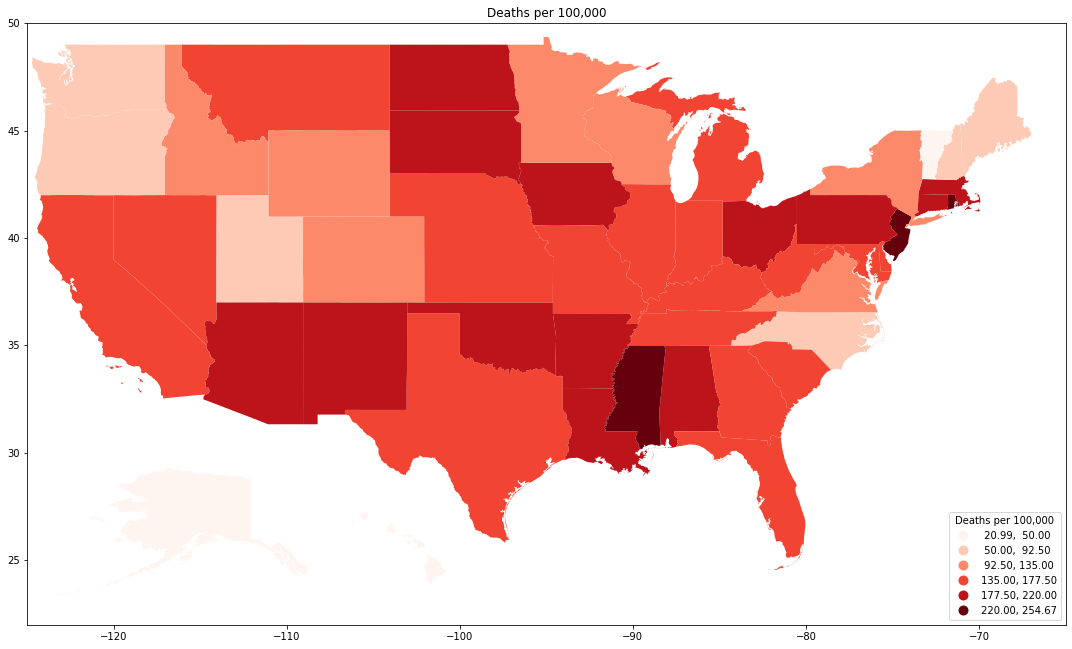

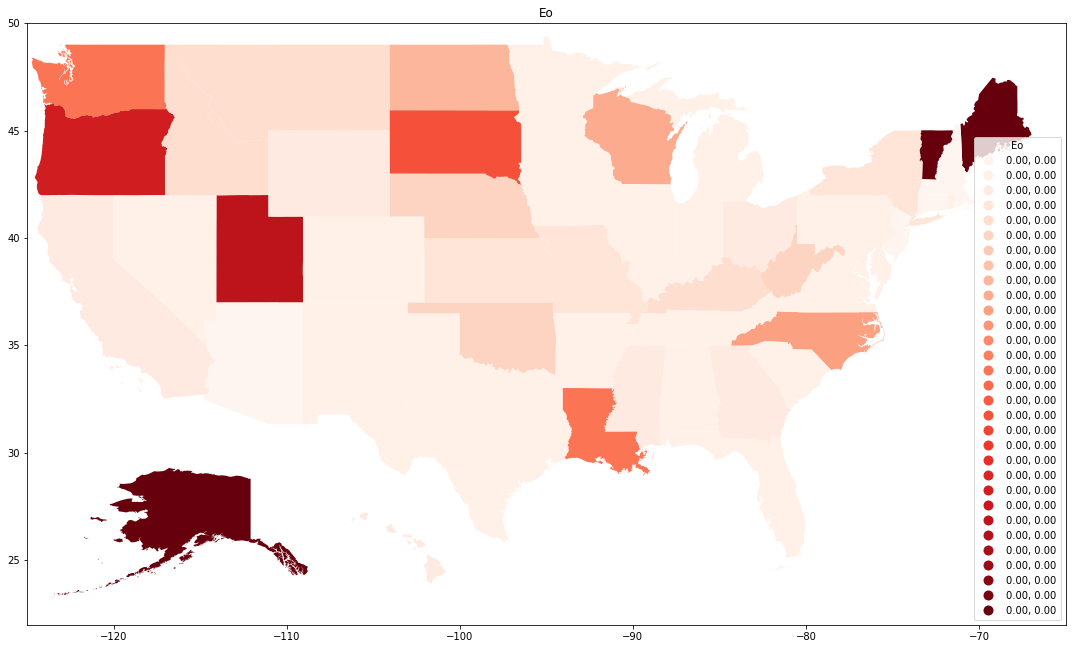

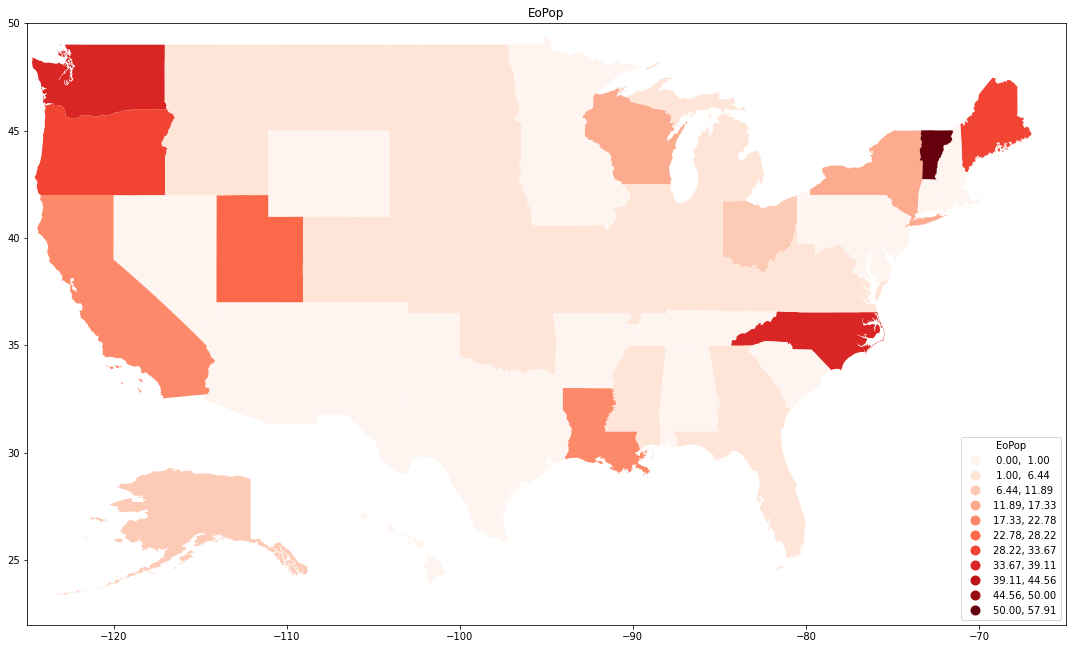

In [3]:

def plot_field(df,name,bmin,bmax,nbins,colormap="viridis",percent=False):
    if percent:
        new_name = name + " (%)"
        df[new_name] = df[name] * 100
    else:
        new_name = name
        
    d_bins = np.linspace(bmin,bmax,nbins)
    cls_kwds = dict(bins=d_bins)
    
    # Plotting:
    fig,ax = plt.subplots(figsize=(15,10))

    df.plot(new_name,ax=ax,legend=True,\
                  cmap=colormap,scheme="User_Defined",\
            classification_kwds = cls_kwds,\
           legend_kwds = {'loc':'lower right',\
                         'title':new_name});
    plt.xlim([-125,-65])
    plt.ylim([22,50])
    plt.tight_layout()
    plt.title(new_name);
    
# Example, lets' compare deaths to excess deaths. No model output, I don't want to spoil your surprise
cdf["Deaths per 100,000"] = cdf["DEATHS"] / cdf["POPULATION"] * 100000
plot_field(cdf,"Deaths per 100,000",50,220,5,colormap="Reds",percent=False)

plot_field(cdf,"Eo",1E-8,1E-5,30,colormap="Reds",percent=False)
cdf["EoPop"] = cdf["Eo"]* cdf["POPULATION"] 
plot_field(cdf,"EoPop",1,50,10,colormap="Reds",percent=False)


### Identify three states that you believe are outliers in terms of the dynamics.
### Speculate on the reasons some states are outliers. Provide support in terms of data.

 - Alaska - The Eo fraction was very high might be due to under reporting at  the start of the pandemic
 - Vermont - Has a high Eo fraction value if you multiply it by the population, So the inital infection rate is quite high. Another case of no inital reporting 
 - Utah -  Had a high Eo fraction but a really low death rate This might be due to the size of the state

In [4]:
# Investigate the outliers

from SEIR import *
%matplotlib inline
seir = SEIR_class("data_file.pkl")

 Eo 1.5801045220104577e-05   Death Rate0.0005238643426840666    C  [ 0.14251542 -0.02012615 -0.32868944  0.11462108  0.01969739 -0.14335856
  0.25201025]


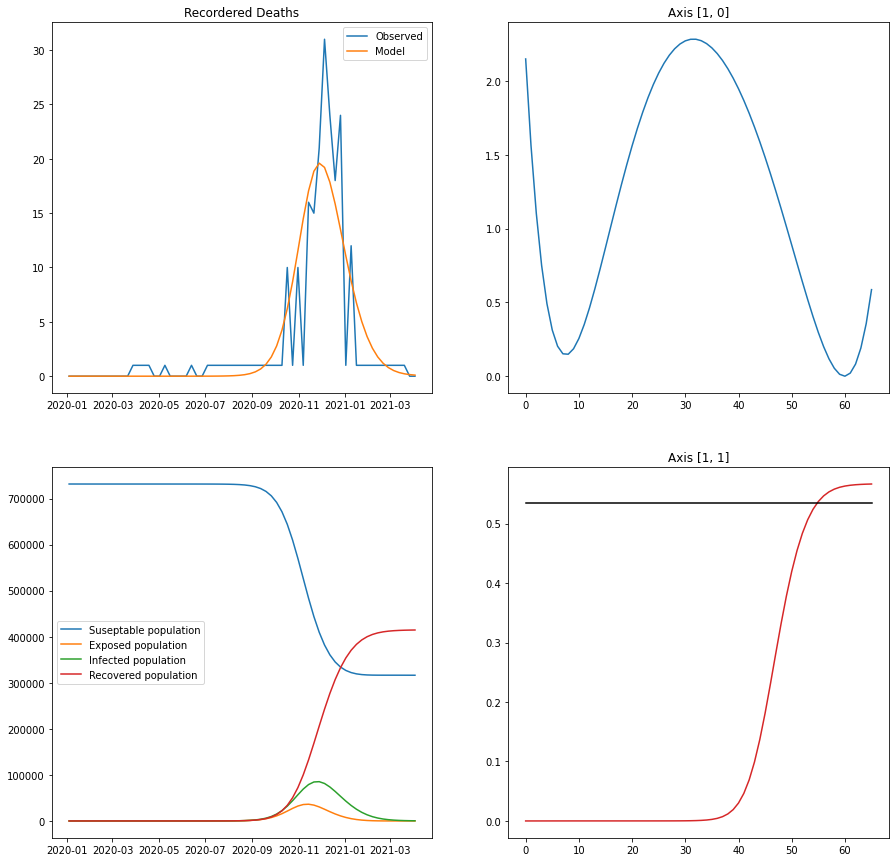

In [5]:

seir.plot_location("Alaska")

 Eo 9.280852793549938e-05   Death Rate0.0019436243299773605    C  [ 0.07054006 -0.00794627 -0.14057054  0.29728676  0.18355052 -0.46023191
  0.05737149]


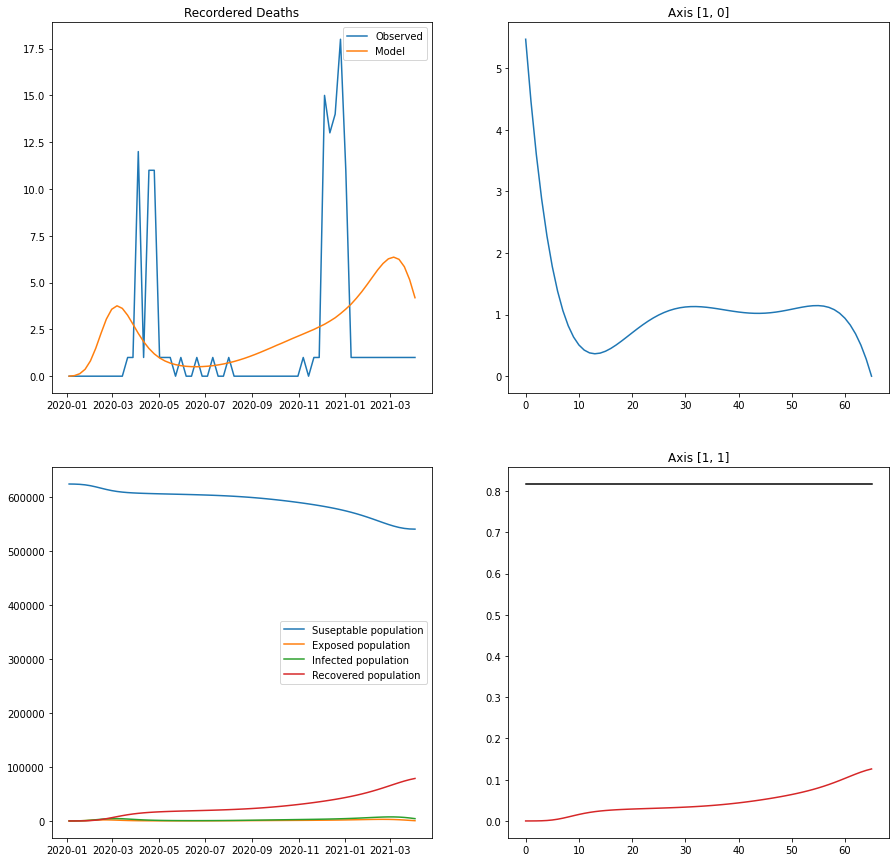

In [6]:

seir.plot_location("Vermont")

 Eo 1.4345408836873193e-06   Death Rate0.0016931422079710745    C  [ 0.08084831  0.10910035  0.1045142   0.22450319  0.52314058 -0.07685974
 -0.01355307]


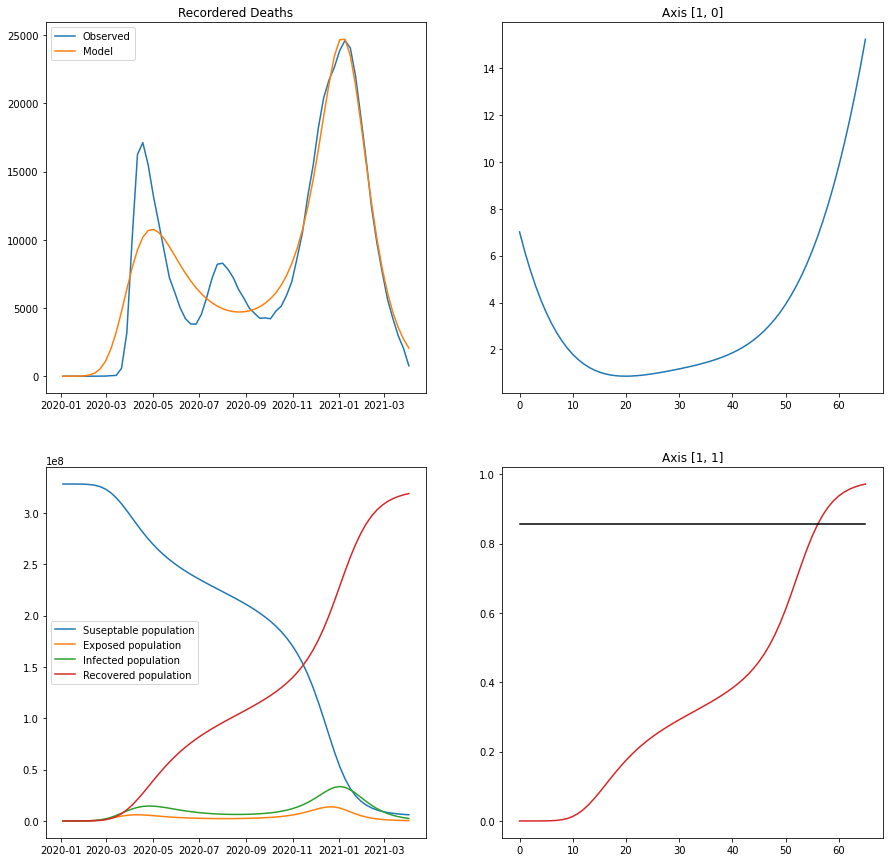

In [12]:
seir.plot_location("United States")

10.0 percent complete
Acceptance rate = 0.100
20.0 percent complete
Acceptance rate = 0.050
30.0 percent complete
Acceptance rate = 0.033
40.0 percent complete
Acceptance rate = 0.025
50.0 percent complete
Acceptance rate = 0.020
60.0 percent complete
Acceptance rate = 0.017
70.0 percent complete
Acceptance rate = 0.014
80.0 percent complete
Acceptance rate = 0.013
90.0 percent complete
Acceptance rate = 0.011
100.0 percent complete
Acceptance rate = 0.010
[ 6.99829100e-02  7.83564941e-02  1.77145013e-01  2.08304728e-01
  4.64664654e-01 -3.35208753e-01 -6.16473476e-01  7.45493393e-04
  8.08027264e-06]
[ 7.03311049e-02  8.02342062e-02  1.77150326e-01  2.07581340e-01
  4.64310226e-01 -3.35635311e-01 -6.17984065e-01  1.82392198e-04
  4.85172360e-04]
Utah


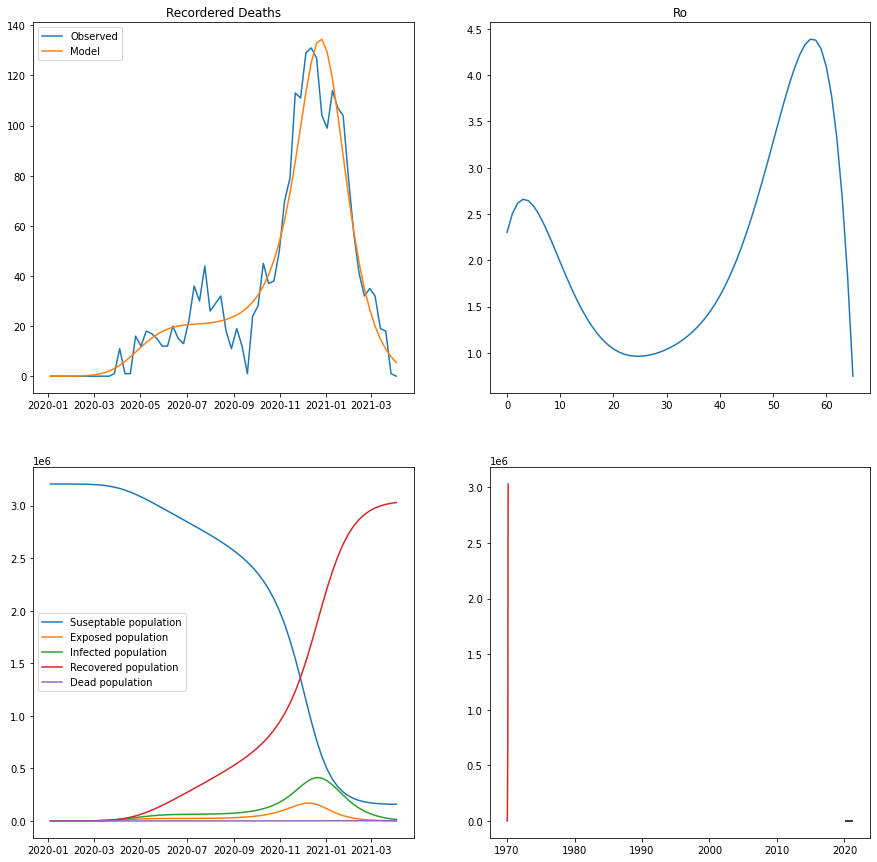

10.0 percent complete
Acceptance rate = 0.200
20.0 percent complete
Acceptance rate = 0.150
30.0 percent complete
Acceptance rate = 0.100
40.0 percent complete
Acceptance rate = 0.075
50.0 percent complete
Acceptance rate = 0.060
60.0 percent complete
Acceptance rate = 0.050
70.0 percent complete
Acceptance rate = 0.043
80.0 percent complete
Acceptance rate = 0.037
90.0 percent complete
Acceptance rate = 0.033
100.0 percent complete
Acceptance rate = 0.030
[ 1.42515416e-01 -2.01261494e-02 -3.28689445e-01  1.14621079e-01
  1.96973918e-02 -1.43358559e-01  2.52010248e-01  5.23864343e-04
  1.58010452e-05]
[ 0.14379819 -0.01696354 -0.32711366  0.11673037  0.01860361 -0.14165591
  0.24697589  0.00169188  0.0005899 ]
Alaska


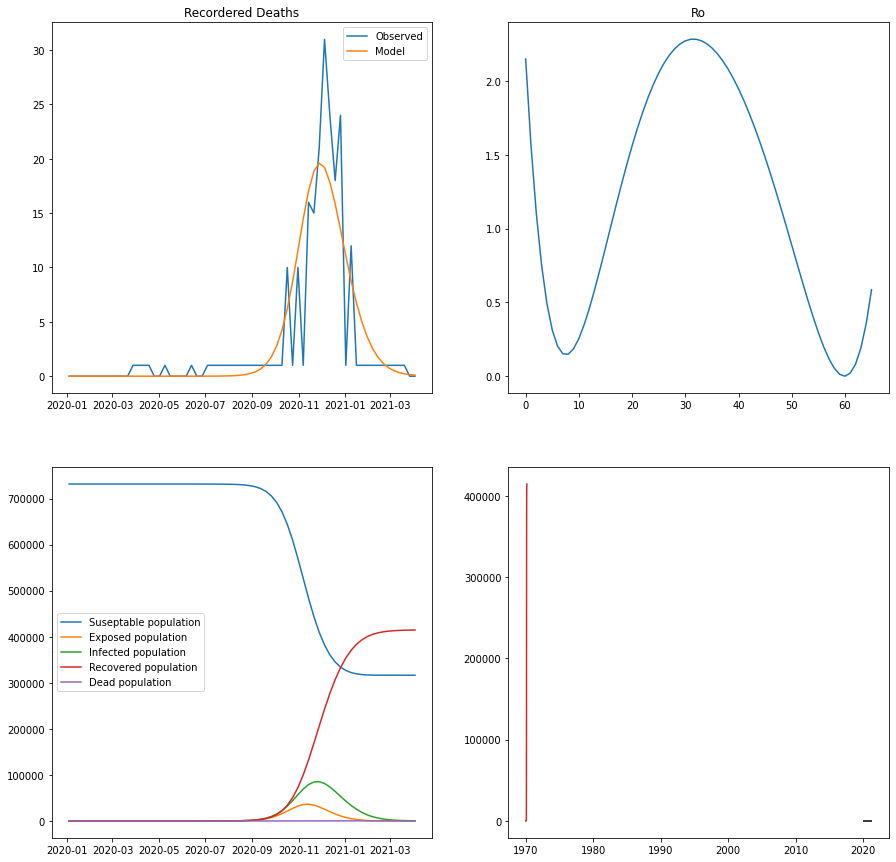

10.0 percent complete
Acceptance rate = 0.100
20.0 percent complete
Acceptance rate = 0.050
30.0 percent complete
Acceptance rate = 0.067
40.0 percent complete
Acceptance rate = 0.075
50.0 percent complete
Acceptance rate = 0.060
60.0 percent complete
Acceptance rate = 0.050
70.0 percent complete
Acceptance rate = 0.043
80.0 percent complete
Acceptance rate = 0.050
90.0 percent complete
Acceptance rate = 0.044
100.0 percent complete
Acceptance rate = 0.050
[ 7.05400635e-02 -7.94627500e-03 -1.40570537e-01  2.97286759e-01
  1.83550521e-01 -4.60231906e-01  5.73714948e-02  1.94362433e-03
  9.28085279e-05]
[ 6.83986402e-02 -6.90719103e-03 -1.39549022e-01  2.98377547e-01
  1.84821516e-01 -4.58032446e-01  5.58587554e-02  3.94283339e-03
  2.08350172e-04]
Vermont


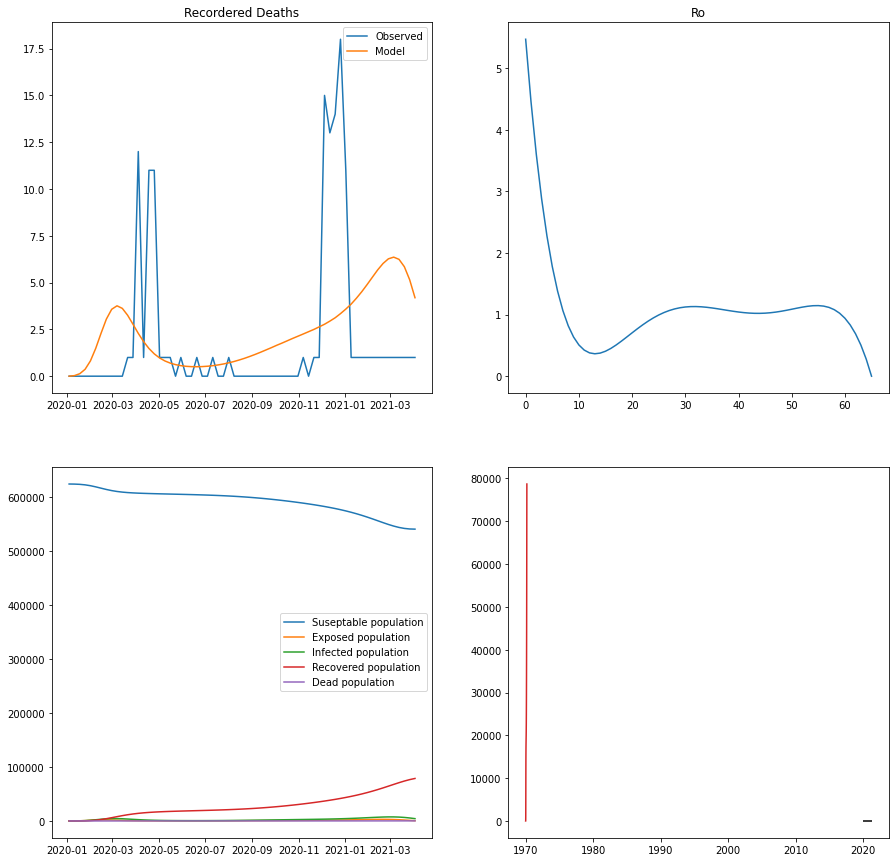

In [8]:
from scipy.interpolate import interp1d
from scipy.stats import norm

from SEIR import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,rosen
%matplotlib inline

step = .001
x_list = []
y_list = []
v_list = []
sigma = .0001

mcmc_app = SEIR_class("data_file.pkl")
mcmc_app.set_location("Utah")
def loglikelihood(x,x_prop):

    y = mcmc_app.get_SSE(x)
    y_prop = mcmc_app.get_SSE(x_prop)

       

    return np.sign(y-y_prop)*(y - y_prop)**2/sigma

def proposal(x):
    return norm(x,step).rvs()

def mcmc_step(x):
    x_prop = proposal(x)
    w = np.log(np.random.rand())
    accept = 0
    test = min(0,loglikelihood(x,x_prop))
    if  w < test:
        x = x_prop.copy()
        accept = 1
        v_list.append(rosen(x))
    x_list.append(x[0])
    y_list.append(x[1])
    return x,accept

def run(x, N):
    accept_ = 0
    for i in range(1,N+1):
        if (i % (N//10)) == 0:
            print("%3.1f percent complete"%float(i/N*100))
            print("Acceptance rate = %4.3f"%(accept_/i))
        x, accept = mcmc_step(x)
        accept_ += accept
        
    return x


def mcmc_then_plot(location):
    coefs,death,Eo = mcmc_app.get_coefs_death_Eo(location)
    x = np.concatenate([coefs,death,Eo])
    new_x = run(x,100)
    print(x)
    print(new_x)
    print(location)
    mcmc_app.plot_mcmc(location,x)
    return np.abs(x-new_x)
    
    
location = "Utah"
loc1 = mcmc_then_plot(location)
location = "Alaska"
loc2 = mcmc_then_plot(location)
location = "Vermont"
loc3 =mcmc_then_plot(location)


In [9]:
print("Average change in values for 3 locations",np.mean([loc1,loc2,loc3],axis=0)[-2:])

Average change in values for 3 locations [0.00124344 0.00038891]


1. The above numbers show that the  death rate and Eo frac all tend to change by 1e-3. It also appears these two value are inversly correlated a lower Eo mens a higher deathrate to get the recorded values

In [11]:
temp =  mcmc_app.get_all_ro()
my_sum = 0
count = 0
for loc in temp:
    my_sum +=temp[loc]
    count +=1
print('Average value of imunity needed for heard imunity',my_sum/count)
print("States that may reach heard imunity with a lower then average number of citizens needed")
for loc in temp:
    
    if temp[loc]<= my_sum/count:
        print(loc,temp[loc])
        
# print("States that may reach heard imunity with a higher then average number of citizens needed")
# for loc in temp:
    
#     if temp[loc]> my_sum/count:
#         print(loc,temp[loc])

Average value of imunity needed for heard imunity 0.8066437472694772
States that may reach heard imunity with a lower then average number of citizens needed
Alaska 0.5039580694403735
Arizona 0.8002178937453082
California 0.8046809183144134
Hawaii 0.4502123866439607
Idaho 0.6233633298065333
Maine 0.7522379829580064
Montana 0.7776053426249581
New Mexico 0.7695814139671641
North Carolina 0.8048857830798444
North Dakota 0.7933045927387395
Oregon 0.7645661793916716
South Carolina 0.7208135312495745
South Dakota 0.6246100982814221
Tennessee 0.790888694587326
Utah 0.5989039189962818
Vermont 0.8049444426564114
Wyoming 0.7925862144685355


2. I think it is really interesting to look at thestates that have lower  $f_v$ values you can see that Hawaii might be the best example of how stict enforcement of covid rules can help the people as a group
3. I would also like to do the same study but with weekly vacination data for each state to see how the model changes